In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install nltk
%pip install scikit-learn
%pip install torch
%pip install seaborn
%pip install missingno
%pip install demoji
%pip install spacy
%pip install langdetect
%pip install nlpaug
%pip install gensim
%pip install joblib
%pip install pyswarm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import torch
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import warnings

In [3]:
con = sqlite3.connect("dataset/flipkart_products.db")
items = pd.read_sql_query("SELECT * from items", con)
con.close()

In [4]:
items.head()

,product_id,product_name,price,category,sub_category,specifications,ratings,discount,moreinfo
0,ECMB000001,"Redmi 9A (SeaBlue, 32 GB)","₹7,413",Electronics,Mobile,2 GB RAM | 32 GB ROM16.59 cm (6.53 inch) Full ...,4.3,3.0,/redmi-9a-seablue-32-gb/p/itmeabd39a0cd669?pid...
1,ECMB000002,"Redmi 9A (Midnight Black, 32 GB)","₹7,421",Electronics,Mobile,2 GB RAM | 32 GB ROM16.59 cm (6.53 inch) Full ...,4.3,3.0,/redmi-9a-midnight-black-32-gb/p/itmeabd39a0cd...
2,ECMB000003,"Redmi 9A (Nature Green, 32 GB)","₹7,384",Electronics,Mobile,2 GB RAM | 32 GB ROM16.59 cm (6.53 inch) Full ...,4.3,4.0,/redmi-9a-nature-green-32-gb/p/itmeabd39a0cd66...
3,ECMB000004,"Redmi 9 (Carbon Black, 64 GB)","₹10,745",Electronics,Mobile,4 GB RAM | 64 GB ROM16.59 cm (6.53 inch) HD+ D...,4.2,None,/redmi-9-carbon-black-64-gb/p/itm4fb151383983b...
4,ECMB000005,"Redmi 9 (Sky Blue, 64 GB)","₹10,489",Electronics,Mobile,4 GB RAM | 64 GB ROM16.59 cm (6.53 inch) HD+ D...,4.2,None,/redmi-9-sky-blue-64-gb/p/itm4fb151383983b?pid...


In [5]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      82 non-null     object
 1   product_name    82 non-null     object
 2   price           82 non-null     object
 3   category        82 non-null     object
 4   sub_category    82 non-null     object
 5   specifications  82 non-null     object
 6   ratings         82 non-null     object
 7   discount        34 non-null     object
 8   moreinfo        82 non-null     object
dtypes: object(9)
memory usage: 5.9+ KB


In [6]:
con = sqlite3.connect("dataset/flipkart_products.db")

df = pd.read_sql_query("SELECT * from ECMB000001", con)

for i in range(2, len(items) + 1):

    df_temp = pd.read_sql_query("SELECT * from ECMB{:06d}".format(i), con)
    df = pd.concat([df, df_temp])
con.close()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53493 entries, 0 to 289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  53493 non-null  object
 1   review_id   53493 non-null  object
 2   title       53493 non-null  object
 3   review      53493 non-null  object
 4   likes       53493 non-null  object
 5   dislikes    53493 non-null  object
 6   ratings     48488 non-null  object
 7   reviewer    53493 non-null  object
dtypes: object(8)
memory usage: 3.7+ MB


In [8]:
df.head()

,product_id,review_id,title,review,likes,dislikes,ratings,reviewer
0,ECMB000001,ECMB0000010000001,Excellent,Wow superb I love it❤️👍 battery backup so nice 👍👍,740,160,5,Abhishek Saini
1,ECMB000001,ECMB0000010000002,Worth the money,Mobile So Good In Range Redmi 9a Has Miui 12 L...,355,104,4,Dinesh Kumar Sahni
2,ECMB000001,ECMB0000010000003,Just wow!,Wonderful device and smart phone best camera b...,125,47,5,Flipkart Customer
3,ECMB000001,ECMB0000010000004,Simply awesome,Very good mobile. Value for money. Battery bac...,0,0,5,Amit Sen
4,ECMB000001,ECMB0000010000005,Highly recommended,Really great.... value for money...,90,15,5,Sudeshna pakira


<Figure size 2500x2000 with 0 Axes>

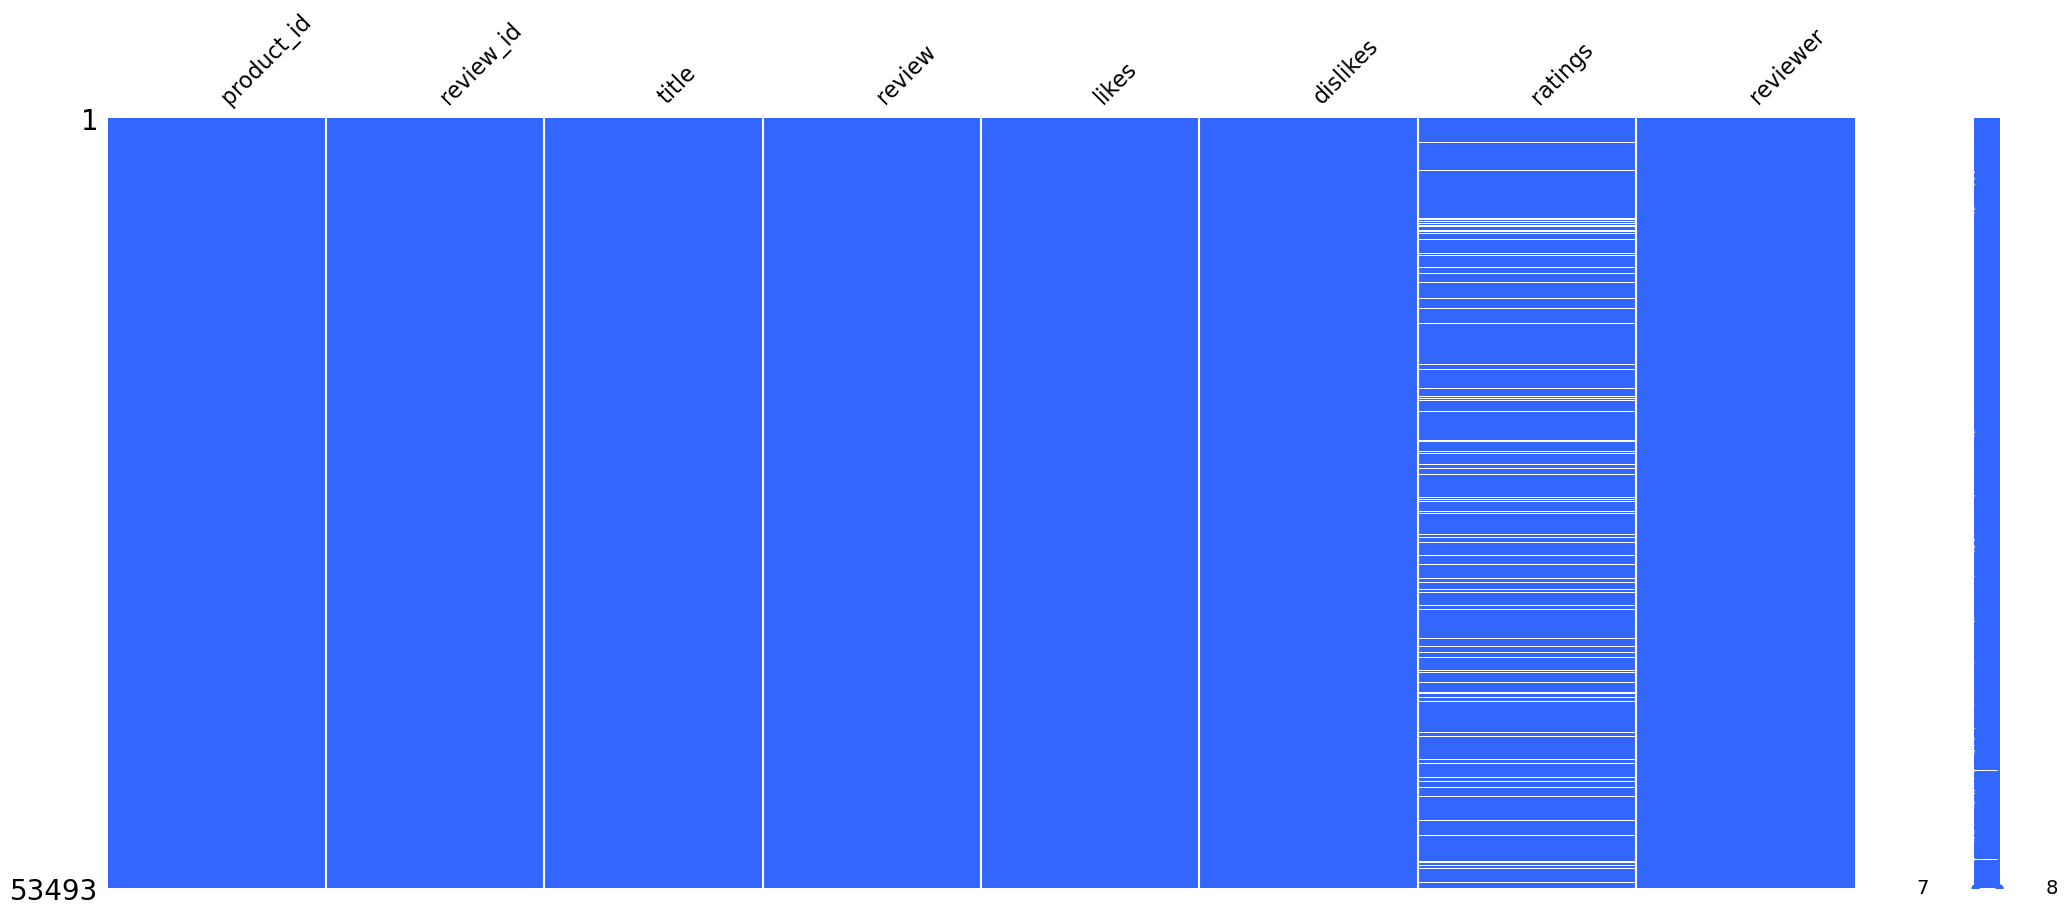

In [9]:
import missingno as msno

plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [10]:
df.dropna(inplace=True, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48488 entries, 0 to 287
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  48488 non-null  object
 1   review_id   48488 non-null  object
 2   title       48488 non-null  object
 3   review      48488 non-null  object
 4   likes       48488 non-null  object
 5   dislikes    48488 non-null  object
 6   ratings     48488 non-null  object
 7   reviewer    48488 non-null  object
dtypes: object(8)
memory usage: 3.3+ MB


<Figure size 2500x2000 with 0 Axes>

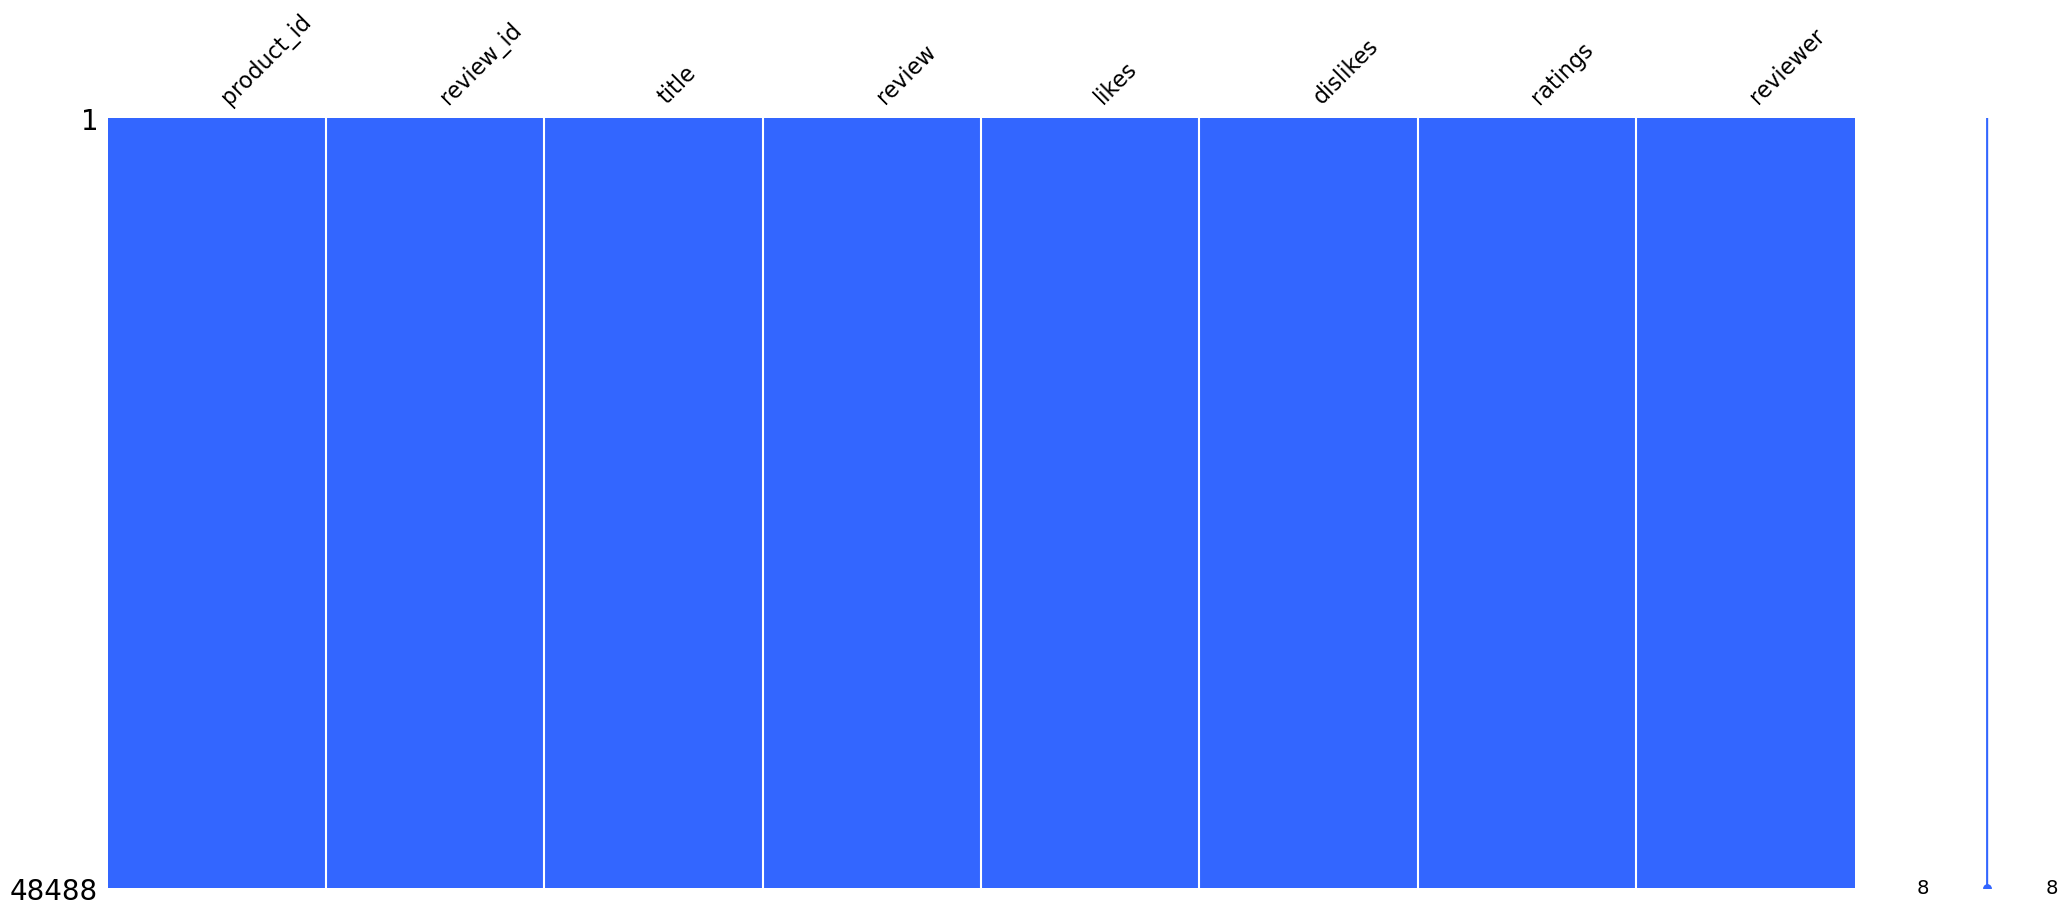

In [11]:
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [12]:
def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text

In [13]:
sample = "ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 \n https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜"
print(f"Text before removing url:- \n {sample}")

sample = remove_url(sample)
print(f"Text after removing url:- \n {sample}")

Text before removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
 https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜


In [14]:
import unicodedata as uni

print(f"Text before Unicode Normalization:- \n {sample}")

sample = uni.normalize("NFKD", sample)
print(f"Text after Unicode Normalization:- \n {sample}")

Text before Unicode Normalization:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after Unicode Normalization:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook


In [15]:
import demoji

def handle_emoji(string):
    emojis = demoji.findall(string)
    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")

Before Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook
After Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am  smiling face with smiling eyes to create this notebook


In [16]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()
    return text

sample = "Hi Everyone I am Ankit Gupta."
print(sample)
print(word_tokenizer(sample))

Hi Everyone I am Ankit Gupta.
['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']


In [17]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/faiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords

en_stopwords = set(stopwords.words("english"))
print(f"Stop Words in English : \n{ en_stopwords}")

Stop Words in English : 
{'she', 'll', 'how', 'through', 'a', 'didn', 'wasn', 'out', 'being', "mustn't", 'at', 'so', 'mustn', 'was', 'wouldn', "that'll", 'nor', 'other', 'hasn', 'on', 'same', "isn't", 'should', 'haven', 'these', 'by', 'above', 'each', 'when', "hadn't", 'our', 'such', "won't", 'before', 'during', 'more', "it's", 'then', 'most', 'to', 'am', 'just', 'they', 'down', 'he', "don't", 'shan', 'herself', 'their', "shouldn't", 'the', 'while', 'your', 'mightn', 'as', 'because', 'been', 'too', 'with', 'were', "mightn't", 'yours', 'i', 'this', "she's", 'under', "didn't", 'after', 'does', "haven't", 'yourself', 'whom', 'an', 'yourselves', "shan't", 'm', 'there', 'some', 'off', 'we', "wouldn't", 'hers', 'doing', "should've", 'in', 'him', "aren't", 'only', 'myself', 'having', 'my', 'ain', 'than', 'hadn', 'between', 'weren', 'not', 'or', 'but', 'for', 'own', 'are', 'who', 's', 'don', "doesn't", 'will', 'y', "weren't", 'had', 'what', "needn't", 'few', 'itself', 'against', 'once', 'his',

In [19]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text

print(f"Before removing stopwords : {word_tokenizer(sample)}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")

Before removing stopwords : ['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']
After removing stopwords : ['hi', 'everyone', 'ankit', 'gupta.']


In [20]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stemming(text):

    text = [stemmer.stem(word) for word in text]
    return text

sample = "I am creating a Notebook"
print(f"Before Stemming : {(sample)}")
print(f"After Stemming : {stemming(word_tokenizer(sample))}")

Before Stemming : I am creating a Notebook
After Stemming : ['i', 'am', 'creat', 'a', 'notebook']


In [21]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [22]:
import spacy

sp = spacy.load("en_core_web_sm")

In [23]:
def lemmatization(text):
    text = " ".join(text)
    token = sp(text)
    text = [word.lemma_ for word in token]
    return text

print(f"Before Lemmatization : {word_tokenizer(sample)}")
print(f"After Lemmatization : {lemmatization(word_tokenizer(sample))}")

Before Lemmatization : ['i', 'am', 'creating', 'a', 'notebook']
After Lemmatization : ['I', 'be', 'create', 'a', 'notebook']


In [24]:
from langdetect import detect


en_text = """"Hi Everyone I am Ankit Gupta."""
print(f" {en_text} : {detect(en_text)}")

hindi_text = """मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ"""
print(f"{hindi_text} : {detect(hindi_text)}")

 "Hi Everyone I am Ankit Gupta. : tl
मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ : hi


In [25]:
df_temp = df.copy()

In [26]:
def label(y):
    if y == "5":
        return 1
    elif y == "4":
        return 1
    else:
        return 0

In [27]:
from tqdm import tqdm

tqdm.pandas()

df_temp["y"] = df_temp.ratings.progress_map(label)

100%|████████████████████████████████| 48488/48488 [00:00<00:00, 1793780.15it/s]


In [28]:
df_temp = df_temp[["review", "y", "ratings"]]

In [29]:
df_temp.head()

,review,y,ratings
0,Wow superb I love it❤️👍 battery backup so nice 👍👍,1,5
1,Mobile So Good In Range Redmi 9a Has Miui 12 L...,1,4
2,Wonderful device and smart phone best camera b...,1,5
3,Very good mobile. Value for money. Battery bac...,1,5
4,Really great.... value for money...,1,5


In [30]:
df_temp.y.value_counts()

y
1    44751
0     3737
Name: count, dtype: int64

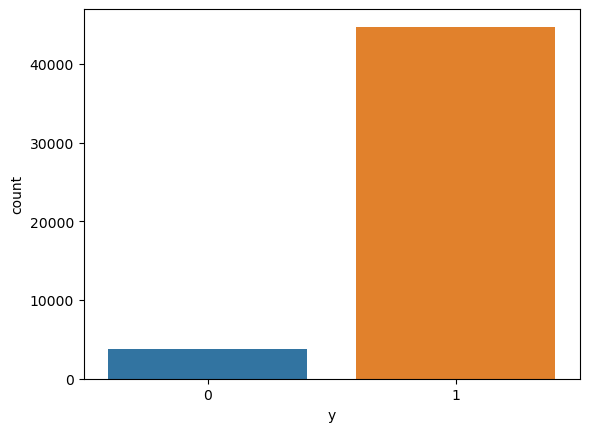

In [31]:
import seaborn as sns

sns.countplot(x="y", data=df_temp)
plt.show()

In [32]:
df_temp2 = df_temp[(df_temp["ratings"] == "5")]

In [33]:
positive = list(
    df_temp2[
        (df_temp2["review"].str.len() > 100) & (df_temp2["review"].str.len() < 350)
    ]["review"]
)

In [34]:
len(positive)

4803

In [35]:
import nlpaug.augmenter.word as naw

In [36]:
positive[41:49]

["An amazing smartphone for the price though i didn't like the colors compared to a realme phone in the same price range. It's a reall good second smartphone if you already have a primary device.",
 "Nice product according to its budget. But it's hard to play high Graphics games like pubg on 3GB RAM. It lags even when you play at Smooth Graphics settings. If this is for gaming (High graphics game) purpose, then don't go for 3GB or 2 GB RAM and the rest it works very well.",
 'I gave this phone to my wife as a gift and she loved it so much that she gets great performance and photos of games',
 'Every thing is great about the phone but a micro USB connector with a 5000 mah battery kind of suck a type c connector would have been better',
 'Very good handset at this price. Nice and great performance. Battery backup is also trustworthy. There is no issue till date after using for a period of 5days. Overall u can buy this phone without hesitation',
 'I am happy with your productus policy of 

In [37]:
aug = naw.AntonymAug(
    name="Antonym_Aug",
    aug_min=1,
    aug_max=10,
    aug_p=0.3,
    lang="eng",
    stopwords=en_stopwords,
    tokenizer=None,
    reverse_tokenizer=None,
    stopwords_regex=None,
    verbose=0,
)

aug_negative = aug.augment(positive)

In [38]:
len(aug_negative)

4803

In [39]:
aug_negative[41:49]

["An amazing smartphone for the price though i didn ' t like the colors compared to a realme phone in the same price range. It ' s a reall evil second smartphone if you already have a secondary device.",
 "Nice product according to its budget. But it ' s hard to play low Graphics games like pubg on 3GB RAM. It lags even when you play at Smooth Graphics settings. If this is for gaming (Low graphics game) purpose, then don ' t malfunction for 3GB or 2 GB RAM and the rest it malfunction very badly.",
 'I starve this phone to my wife as a gift and she hate it so little that she take away great performance and photos of games',
 'Every thing is great about the phone but a micro USB connector with a 5000 mah battery kind of suck a type c connector would have been worse',
 'Very bad handset at this price. Nice and great performance. Battery backup is also untrustworthy. There is no issue till date after using for a period of 5days. Overall u can sell this phone without hesitation',
 'I am unh

In [40]:
df_negative = pd.DataFrame({"review": aug_negative, "y": [0] * len(aug_negative)})

In [41]:
df_positive = pd.DataFrame({"review": positive, "y": [1] * len(positive)})

In [42]:
df_temp = (
    pd.concat([df_negative, df_positive])
    .sample(frac=1, random_state=11)
    .reset_index(drop=True)
)

In [43]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9606 entries, 0 to 9605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9606 non-null   object
 1   y       9606 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 150.2+ KB


In [44]:
df_temp.head()

,review,y
0,great phone in budget. .. pubg performance was...,0
1,Best Smartphone by Mi in this Range. . be born...,0
2,Bad smooth phone. . and back camera quality is...,0
3,Thise is very nice mobile ...I like it very mu...,1
4,I m meagerly fall short of 👍 All section r sup...,0


In [45]:
df = df_temp

In [46]:
def preprocessing(text):

    text = remove_url(text)
    text = uni.normalize("NFKD", text)
    text = handle_emoji(text)
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [47]:
from tqdm import tqdm

tqdm.pandas()

df["clean_review"] = df["review"].progress_map(preprocessing)

100%|██████████████████████████████████████| 9606/9606 [01:07<00:00, 143.12it/s]


In [48]:
df.head()

,review,y,clean_review
0,great phone in budget. .. pubg performance was...,0,great phone budget pubg performance rough came...
1,Best Smartphone by Mi in this Range. . be born...,0,well smartphone mi range bear r confuse samsun...
2,Bad smooth phone. . and back camera quality is...,0,bad smooth phone back camera quality evil rear...
3,Thise is very nice mobile ...I like it very mu...,1,thise nice mobile I like much delivery also fa...
4,I m meagerly fall short of 👍 All section r sup...,0,I meagerly fall short thumb section r superb d...


In [49]:
reviews = df.clean_review.values.tolist()

In [50]:
from tqdm import tqdm

tqdm.pandas()

df["clean_review2"] = df["clean_review"].progress_map(word_tokenizer)

100%|███████████████████████████████████| 9606/9606 [00:00<00:00, 174713.41it/s]


In [51]:
data_words = df["clean_review2"].values.tolist()

In [52]:
len(data_words)

9606

In [53]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [54]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint

num_topics = 10
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.046*"i" + 0.045*"phone" + 0.030*"good" + 0.016*"flipkart" + '
  '0.016*"mobile" + 0.014*"thank" + 0.014*"battery" + 0.013*"product" + '
  '0.012*"awesome" + 0.011*"camera"'),
 (1,
  '0.059*"good" + 0.038*"mobile" + 0.027*"camera" + 0.024*"battery" + '
  '0.022*"phone" + 0.015*"awesome" + 0.013*"nice" + 0.013*"also" + 0.012*"i" + '
  '0.012*"mi"'),
 (2,
  '0.024*"camera" + 0.023*"good" + 0.021*"phone" + 0.021*"i" + 0.021*"battery" '
  '+ 0.018*"bad" + 0.018*"performance" + 0.016*"display" + 0.014*"nice" + '
  '0.013*"evil"'),
 (3,
  '0.032*"good" + 0.028*"camera" + 0.026*"phone" + 0.024*"i" + 0.018*"like" + '
  '0.014*"nice" + 0.013*"performance" + 0.012*"note" + 0.010*"battery" + '
  '0.010*"redmi"'),
 (4,
  '0.043*"i" + 0.036*"phone" + 0.032*"camera" + 0.025*"good" + 0.018*"bad" + '
  '0.017*"battery" + 0.014*"product" + 0.014*"price" + 0.013*"mobile" + '
  '0.013*"quality"'),
 (5,
  '0.022*"price" + 0.022*"battery" + 0.021*"phone" + 0.020*"great" + '
  '0.020*"product" + 0.

In [55]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100, window=5, min_count=5, workers=4,sg=1)

CPU times: user 9.42 s, sys: 516 ms, total: 9.94 s
Wall time: 3.69 s


In [56]:
cpath="modelsave/"
fasttext_model.save(cpath+"FastText-Model-For-ABSA.bin")

In [57]:
fasttext_model.wv.n_similarity("I really like the camera of this phone", "battery")

0.9570664

In [58]:
aspects = ["phone", "camera", "battery", "quality", "processor"]

def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

In [59]:
from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    df[aspect] = df['clean_review2'].progress_map(lambda text: get_similarity(text, aspect))

100%|█████████████████████████████████████| 9606/9606 [00:07<00:00, 1351.78it/s]


In [60]:
df.head()

,review,y,clean_review,clean_review2,phone,camera,battery,quality,processor
0,great phone in budget. .. pubg performance was...,0,great phone budget pubg performance rough came...,"[great, phone, budget, pubg, performance, roug...",0.905900,0.882928,0.949051,0.812833,0.908254
1,Best Smartphone by Mi in this Range. . be born...,0,well smartphone mi range bear r confuse samsun...,"[well, smartphone, mi, range, bear, r, confuse...",0.894832,0.845970,0.950308,0.843322,0.878978
2,Bad smooth phone. . and back camera quality is...,0,bad smooth phone back camera quality evil rear...,"[bad, smooth, phone, back, camera, quality, ev...",0.854252,0.904393,0.953007,0.836709,0.917443
3,Thise is very nice mobile ...I like it very mu...,1,thise nice mobile I like much delivery also fa...,"[thise, nice, mobile, i, like, much, delivery,...",0.852372,0.860145,0.915144,0.852916,0.865790
4,I m meagerly fall short of 👍 All section r sup...,0,I meagerly fall short thumb section r superb d...,"[i, meagerly, fall, short, thumb, section, r, ...",0.842975,0.888513,0.969545,0.860077,0.916119


In [61]:
spath="dataset/"
df.to_csv(spath+"Clean_Flipkart_Product.csv", index = False)

/home/faiz/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Cross-validation
Cross-validation scores: [0.95941727 0.9531494  0.95158771 0.9573139  0.95471109]
Mean CV accuracy: 0.9552358753489146
Standard deviation of CV accuracy: 0.0028192242087384336

K-fold
K-fold scores: [0.9573361082206036, 0.956793336803748, 0.9484643414888079, 0.9536699635606455, 0.9495054659031754]
Mean k-fold accuracy: 0.9531538431953962
Standard deviation of kfold accuracy: 0.0036415853091811123

Classification Report for Cross-validation:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4803
           1       0.96      0.98      0.97      4803

    accuracy                           0.97      9606
   macro avg       0.97      0.97      0.97      9606
weighted avg       0.97      0.97      0.97      9606

F1 Score: 96.99%
Classification Report for K-fold:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      4803
           1       0.94      0.97      0.95      48

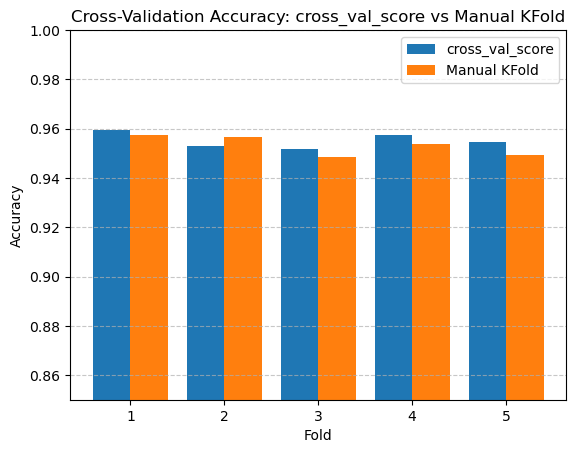

cross_val_score - Mean: 0.9552358753489146 Std Dev: 0.0028192242087384336
Manual KFold - Mean: 0.9531538431953962 Std Dev: 0.0036415853091811123


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report


df = pd.read_csv("dataset/Clean_Flipkart_Product.csv")


def tokenizer(text):
    return text.split()


tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer)
X = tfidf_vectorizer.fit_transform(df["clean_review"])
y = df["y"].values


logistic_regression_model = LogisticRegression()


cv_scores = cross_val_score(logistic_regression_model, X, y, cv=5)


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
manual_kfold_scores = []
predictions = []
true_labels = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    logistic_regression_model.fit(X_train, y_train)  # Fit on training data
    accuracy = logistic_regression_model.score(X_test, y_test)  # Calculate accuracy
    manual_kfold_scores.append(accuracy)
    y_pred = logistic_regression_model.predict(X_test)
    predictions.extend(y_pred)
    true_labels.extend(y_test)

print("Cross-validation")
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))

print()
print("K-fold")
print("K-fold scores:", manual_kfold_scores)
print("Mean k-fold accuracy:", np.mean(manual_kfold_scores))
print("Standard deviation of kfold accuracy:", np.std(manual_kfold_scores))

print()
print("Classification Report for Cross-validation:")
print(classification_report(y, logistic_regression_model.predict(X)))
print(f"F1 Score: {round(f1_score(y, logistic_regression_model.predict(X))*100,2)}%")

print("Classification Report for K-fold:")
print(classification_report(true_labels, predictions))
print(f"F1 Score: {round(f1_score(true_labels, predictions)*100,2)}%")

plt.bar([fold - 0.2 for fold in range(1, 6)], cv_scores, width=0.4, label='cross_val_score')
plt.bar([fold + 0.2 for fold in range(1, 6)], manual_kfold_scores, width=0.4, label='Manual KFold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy: cross_val_score vs Manual KFold')
plt.xticks(range(1, 6))
plt.ylim(0.85, 1)  # Adjust the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

mean_manual_score = np.mean(manual_kfold_scores)
std_manual_score = np.std(manual_kfold_scores)

print("cross_val_score - Mean:", mean_cv_score, "Std Dev:", std_cv_score)
print("Manual KFold - Mean:", mean_manual_score, "Std Dev:", std_manual_score)


In [90]:
import joblib
spath="modelsave/"
joblib.dump(logistic_regression_model, spath+'logistic_regression_model.joblib')
joblib.dump(tfidf_vectorizer, spath+'tfidf_vectorizer.joblib')

['modelsave/tfidf_vectorizer.joblib']

No constraints given.
New best for swarm at iteration 1: [  6.68462276 471.3026938    0.65520482] -0.9599208810447646
Best after iteration 1: [  6.68462276 471.3026938    0.65520482] -0.9599208810447646
Best after iteration 2: [  6.68462276 471.3026938    0.65520482] -0.9599208810447646
New best for swarm at iteration 3: [  9.05238684 381.4449368    0.52218883] -0.9600249393173972
Best after iteration 3: [  9.05238684 381.4449368    0.52218883] -0.9600249393173972
Best after iteration 4: [  9.05238684 381.4449368    0.52218883] -0.9600249393173972
Best after iteration 5: [  9.05238684 381.4449368    0.52218883] -0.9600249393173972
Best after iteration 6: [  9.05238684 381.4449368    0.52218883] -0.9600249393173972
Best after iteration 7: [  9.05238684 381.4449368    0.52218883] -0.9600249393173972
Best after iteration 8: [  9.05238684 381.4449368    0.52218883] -0.9600249393173972
Best after iteration 9: [  9.05238684 381.4449368    0.52218883] -0.9600249393173972
Best after iteration 

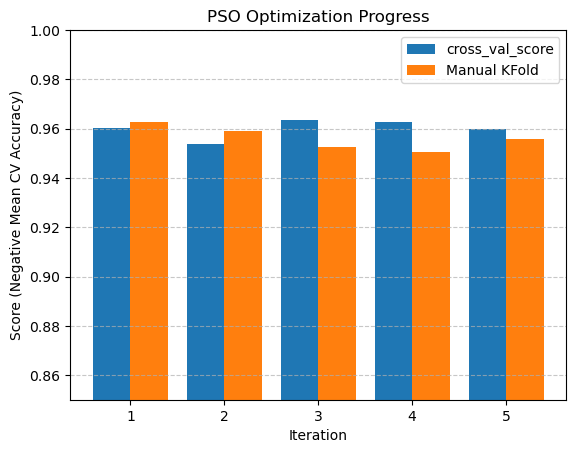

In [91]:
import torch
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from pyswarm import pso
from sklearn.metrics import classification_report


df = pd.read_csv("dataset/Clean_Flipkart_Product.csv")


tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df["clean_review"])

X = tfidf_vectorizer.transform(df["clean_review"])
y = df["y"].values


def logistic_regression_model(params):
    C = params[0]
    max_iter = int(params[1])
    solver = 'liblinear' if params[2] < 0.5 else 'lbfgs'
    
    model = LogisticRegression(C=C, max_iter=max_iter, solver=solver)
    scores = cross_val_score(model, X, y, cv=5)
    return -np.mean(scores)  

# PSO optimization
lb = [0.01, 50, 0]  
ub = [10, 500, 1]  
swarmsize = 15     
maxiter = 20        

# Perform PSO optimization
best_params, best_scores = pso(logistic_regression_model, lb, ub, swarmsize=swarmsize, maxiter=maxiter, debug=True)

print("Best hyperparameters:", best_params)


best_values = np.array(best_scores)  

# Train the final model with the best parameters
best_model = LogisticRegression(C=best_params[0], max_iter=int(best_params[1]), solver='liblinear' if best_params[2] < 0.5 else 'lbfgs')
cv_scores = cross_val_score(best_model, X, y, cv=5)

# Get predictions using cross_val_predict
cv_predicted = cross_val_predict(best_model, X, y, cv=5)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
manual_kfold_scores = []
manual_kfold_predicted = []

# Iterate through each fold manually
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    best_model.fit(X_train, y_train)  # Fit on training data
    accuracy = best_model.score(X_test, y_test)  # Calculate accuracy
    manual_kfold_scores.append(accuracy)
    y_pred = best_model.predict(X_test)
    manual_kfold_predicted.extend(y_pred)

print("Cross-validation")
print("Cross-validation scores after pso:", cv_scores)
print("Mean CV accuracy after pso:", np.mean(cv_scores))
print("Standard deviation of CV accuracy: after pso", np.std(cv_scores))
print("Classification Report for cross_val_score:")
print(classification_report(y, cv_predicted))
print(f"F1 Score: {round(f1_score(y, cv_predicted)*100,2)}%") 

print()
print("K-fold")

print("K-fold scores after pso:", manual_kfold_scores)
print("Mean k-fold accuracy: after pso", np.mean(manual_kfold_scores))
print("Standard deviation of kfold accuracy: after pso", np.std(manual_kfold_scores))
print("Classification Report for Manual KFold:")
print(classification_report(y, manual_kfold_predicted))
print(f"F1 Score: {round(f1_score(y, manual_kfold_predicted)*100,2)}%") 

plt.bar([iter - 0.2 for iter in range(1,6)], cv_scores, width=0.4, label='cross_val_score')
plt.bar([iter + 0.2 for iter in range(1,6)], manual_kfold_scores, width=0.4, label='Manual KFold')
plt.xlabel('Iteration')
plt.ylabel('Score (Negative Mean CV Accuracy)')
plt.title('PSO Optimization Progress')
plt.xticks(range(1,6))
plt.ylim(0.85, 1)  # Adjust the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [82]:
import joblib
spath="modelsave/"
joblib.dump(best_model, spath+'best_model_pso.joblib')
joblib.dump(tfidf_vectorizer, spath+'tfidf_vectorizer_pso.joblib')

['modelsave/tfidf_vectorizer_pso.joblib']

/home/faiz/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Cross-validation
Cross-validation scores: [0.95941727 0.9531494  0.95158771 0.9573139  0.95471109]
Mean CV accuracy: 0.9552358753489146
Standard deviation of CV accuracy: 0.0028192242087384336

Cross-validation particle swarm optimization
Cross-validation scores: [0.95993757 0.95419053 0.96512233 0.9614784  0.95939615]
Mean CV accuracy: 0.9600249934862013
Standard deviation of CV accuracy: 0.0035366466060944056


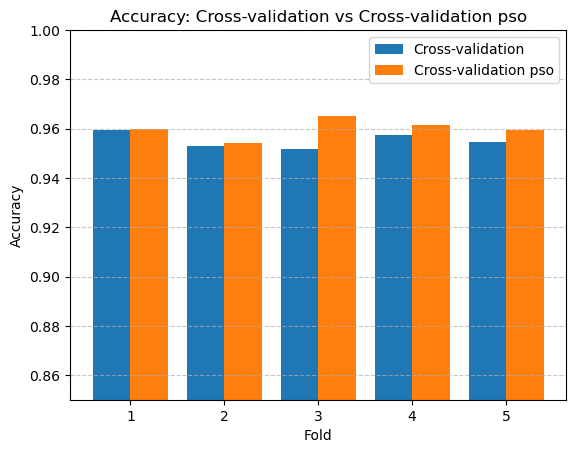

In [85]:
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import torch
import pandas as pd
from torch import nn

spath="modelsave/"
tfidf_vectorizer = joblib.load(spath+"tfidf_vectorizer.joblib")
logistic_regression_model = joblib.load(spath+"logistic_regression_model.joblib")

tfidf_vectorizer_pso = joblib.load(spath+"tfidf_vectorizer_pso.joblib")
best_model_pso = joblib.load(spath+"best_model_pso.joblib")

X = tfidf_vectorizer.fit_transform(df["clean_review"])
y = df["y"].values

X_pso = tfidf_vectorizer_pso.fit_transform(df["clean_review"])
y_pso = df["y"].values

cv_scores = cross_val_score(logistic_regression_model, X, y, cv=5)
cv_scores_pso = cross_val_score(best_model_pso, X_pso, y_pso, cv=5)

print("Cross-validation")
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))
print()
print("Cross-validation particle swarm optimization")
print("Cross-validation scores:", cv_scores_pso)
print("Mean CV accuracy:", np.mean(cv_scores_pso))
print("Standard deviation of CV accuracy:", np.std(cv_scores_pso))

plt.bar([fold - 0.2 for fold in range(1,6)], cv_scores, width=0.4, label='Cross-validation')
plt.bar([fold + 0.2 for fold in range(1,6)], cv_scores_pso, width=0.4, label='Cross-validation pso')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy: Cross-validation vs Cross-validation pso')
plt.xticks(range(1,6))
plt.ylim(0.85, 1)  # Adjust the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()




/home/faiz/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


K-fold scores
K-fold scores: [0.9573361082206036, 0.956793336803748, 0.9484643414888079, 0.9536699635606455, 0.9495054659031754]
Mean K-fold accuracy: 0.9531538431953962
Standard deviation of K-fold accuracy: 0.0036415853091811123

K-fold scores particle swarm optimization
K-fold scores: [0.9630593132154006, 0.9578344612181156, 0.9515877147319105, 0.9510671525247267, 0.954711087975013]
Mean K-fold accuracy: 0.9556519459330334
Standard deviation of K-fold accuracy: 0.004428453061187504


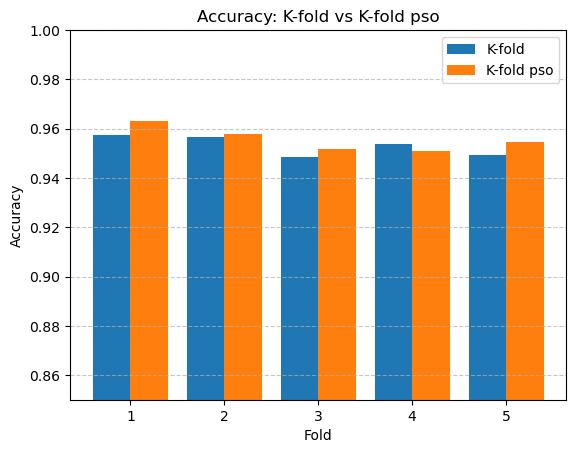

In [86]:
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import torch
import pandas as pd
from torch import nn

spath="modelsave/"
tfidf_vectorizer = joblib.load(spath+"tfidf_vectorizer.joblib")
logistic_regression_model = joblib.load(spath+"logistic_regression_model.joblib")

tfidf_vectorizer_pso = joblib.load(spath+"tfidf_vectorizer_pso.joblib")
best_model_pso = joblib.load(spath+"best_model_pso.joblib")

X = tfidf_vectorizer.fit_transform(df["clean_review"])
y = df["y"].values

X_pso = tfidf_vectorizer_pso.fit_transform(df["clean_review"])
y_pso = df["y"].values

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_scores = []
Kfold_scores_pso=[]

# Iterate through each fold manually
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    logistic_regression_model.fit(X_train, y_train)  # Fit on training data
    accuracy = logistic_regression_model.score(X_test, y_test)  # Calculate accuracy
    kfold_scores.append(accuracy)

for train_idx, test_idx in kfold.split(X_pso):
    X_train, X_test = X_pso[train_idx], X_pso[test_idx]
    y_train, y_test = y_pso[train_idx], y_pso[test_idx]
    best_model_pso.fit(X_train, y_train)  # Fit on training data
    accuracy = best_model_pso.score(X_test, y_test)  # Calculate accuracy
    Kfold_scores_pso.append(accuracy)

print("K-fold scores")
print("K-fold scores:", kfold_scores)
print("Mean K-fold accuracy:", np.mean(kfold_scores))
print("Standard deviation of K-fold accuracy:", np.std(kfold_scores))
print()
print("K-fold scores particle swarm optimization")
print("K-fold scores:", Kfold_scores_pso)
print("Mean K-fold accuracy:", np.mean(Kfold_scores_pso))
print("Standard deviation of K-fold accuracy:", np.std(Kfold_scores_pso))

plt.bar([fold - 0.2 for fold in range(1,6)], kfold_scores, width=0.4, label='K-fold')
plt.bar([fold + 0.2 for fold in range(1,6)], Kfold_scores_pso, width=0.4, label='K-fold pso')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy: K-fold vs K-fold pso')
plt.xticks(range(1,6))
plt.ylim(0.85, 1)  # Adjust the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()



In [87]:
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import torch
import pandas as pd
from torch import nn



spath="modelsave/"
tfidf_vectorizer = joblib.load(spath+"tfidf_vectorizer.joblib")
logistic_regression_model = joblib.load(spath+"logistic_regression_model.joblib")


def get_similarity(text, aspect):
    try:
#         text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0
        
def best_aspect(text, aspects):
    a = []
    for aspect in aspects:
        a.append(get_similarity(text, aspect))
    
    return aspects[np.argmax(a)]

def preprocessing(text):
    text = remove_url(text)
    text = uni.normalize("NFKD", text)
    text = handle_emoji(text)
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)
    return text
    
sample_text = "I just love the phone, camera, features, bought for my mother and she absolutely loves it. Thanks, Flipkart."

X_test = tfidf_vectorizer.transform([sample_text])

prediction = logistic_regression_model.predict(X_test)

prediction_label = "Positive" if prediction == 1 else "Negative"
print("Logistic Regression Prediction for the sample text:", prediction_label)

aspects = ["phone", "camera", "battery", "features", "processor"]

preprocessed_sample = preprocessing(sample_text)
ba = best_aspect(preprocessed_sample, aspects)

print("Best aspect in the sample:", ba)


Logistic Regression Prediction for the sample text: Positive
Best aspect in the sample: battery


In [88]:
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import torch
import pandas as pd
from torch import nn
from sklearn.metrics import f1_score, classification_report



spath="modelsave/"
tfidf_vectorizer = joblib.load(spath+"tfidf_vectorizer_pso.joblib")
logistic_regression_model = joblib.load(spath+"best_model_pso.joblib")

def get_similarity(text, aspect):
    try:
#         text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0
        
def best_aspect(text, aspects):
    a = []
    for aspect in aspects:
        a.append(get_similarity(text, aspect))
    
    return aspects[np.argmax(a)]

def preprocessing(text):
    text = remove_url(text)
    text = uni.normalize("NFKD", text)
    text = handle_emoji(text)
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)
    return text
    
sample_text = "I just love the phone, camera, features, bought for my mother and she absolutely loves it. Thanks, Flipkart."

X_test = tfidf_vectorizer.transform([sample_text])

prediction = logistic_regression_model.predict(X_test)

prediction_label = "Positive" if prediction == 1 else "Negative"
print("Logistic Regression using PSO Prediction for the sample text:", prediction_label)

aspects = ["phone", "camera", "battery", "features", "processor"]

preprocessed_sample = preprocessing(sample_text)
ba = best_aspect(preprocessed_sample, aspects)

print("Best aspect in the sample:", ba)



Logistic Regression using PSO Prediction for the sample text: Positive
Best aspect in the sample: battery
